In [136]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

In [137]:
df=pd.read_csv("IEA-EV-data.csv")

In [138]:
df

,region,category,parameter,mode,powertrain,year,unit,value
0,Australia,Historical,EV sales,Cars,BEV,2011,sales,49.00000
1,Australia,Historical,EV stock,Cars,BEV,2011,stock,49.00000
2,Australia,Historical,EV stock share,Cars,EV,2011,percent,0.00046
3,Australia,Historical,EV sales share,Cars,EV,2011,percent,0.00650
4,Australia,Historical,EV sales share,Cars,EV,2012,percent,0.03000
...,...,...,...,...,...,...,...,...
7429,World,Projection-STEPS,Oil displacement Mbd,Cars,EV,2030,Milion barrels per day,2.40000
7430,World,Projection-STEPS,Oil displacement Mlge,Buses,EV,2030,Milion litres gasoline equivalent,30000.00000
7431,World,Projection-STEPS,Oil displacement Mlge,Trucks,EV,2030,Milion litres gasoline equivalent,14000.00000
7432,World,Projection-STEPS,Oil displacement Mlge,Vans,EV,2030,Milion litres gasoline equivalent,16000.00000


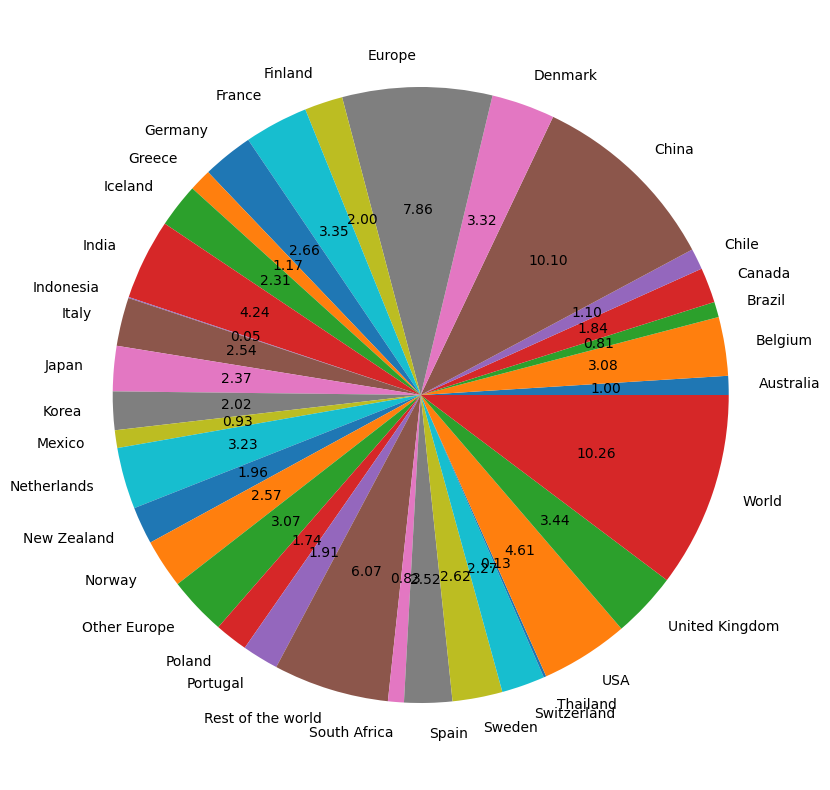

In [139]:
count=df.groupby("region").size()
plt.figure(figsize=(10,10))
count.plot(kind="pie",autopct="%.2f")
plt.show()

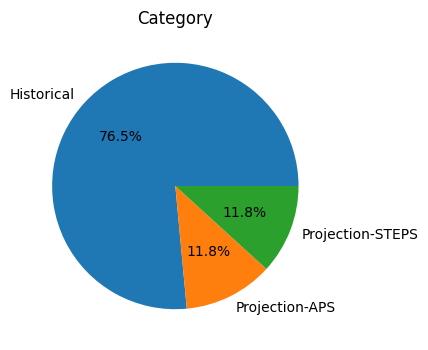

In [140]:
count=df.groupby("category").size()
plt.figure(figsize=(4,4))
count.plot(kind="pie",autopct="%.1f%%")
plt.title("Category")
plt.show()

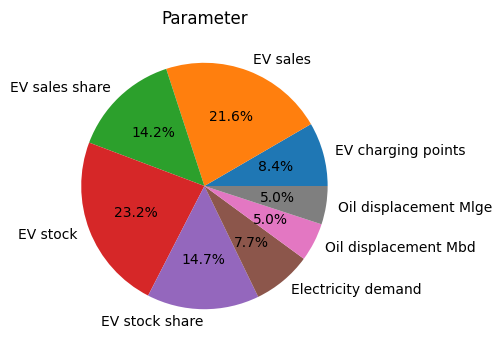

In [141]:
count=df.groupby("parameter").size()
plt.figure(figsize=(4,4))
count.plot(kind="pie",autopct="%.1f%%")
plt.title("Parameter")
plt.show()

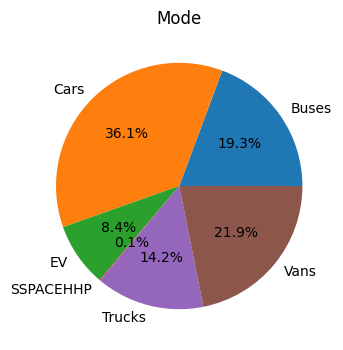

In [142]:
count=df.groupby("mode").size()
plt.figure(figsize=(4,4))
count.plot(kind="pie",autopct="%.1f%%")
plt.title("Mode")
plt.show()

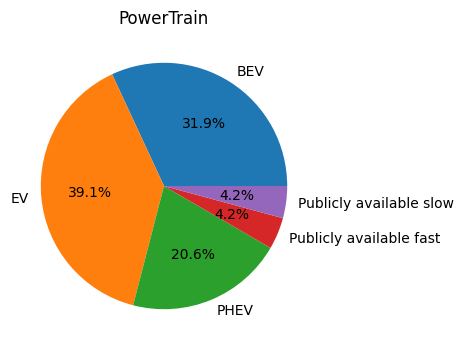

In [143]:
count=df.groupby("powertrain").size()
plt.figure(figsize=(4,4))
count.plot(kind="pie",autopct="%.1f%%")
plt.title("PowerTrain")
plt.show()

In [144]:
df1=df[df["region"]=="India"]

<Axes: xlabel='parameter', ylabel='count'>

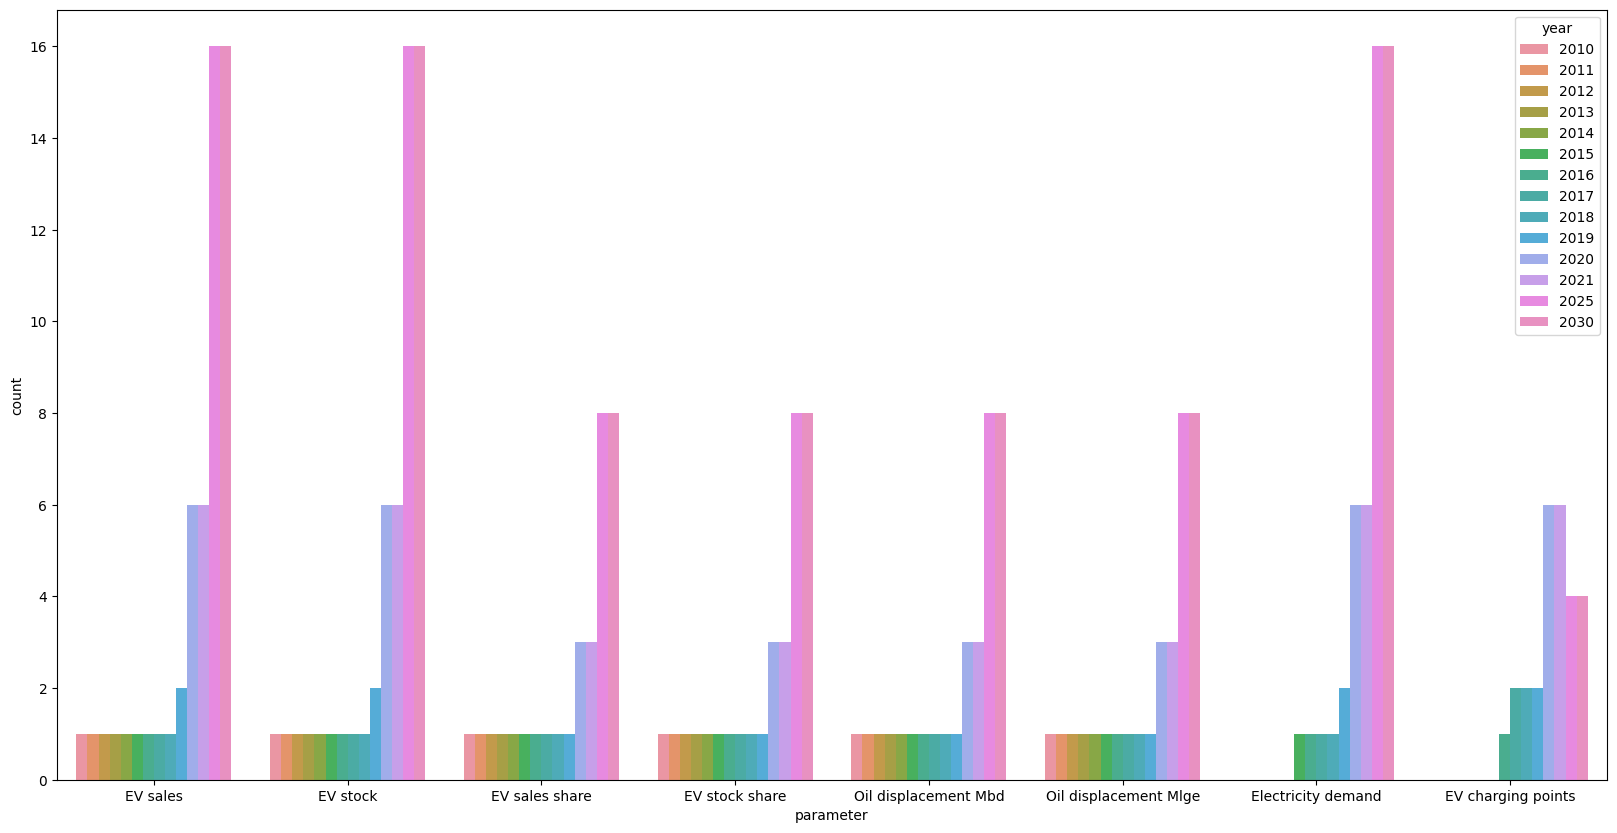

In [145]:
plt.figure(figsize=(20,10))
sns.countplot(x="parameter", data=df1, hue="year")

<Axes: xlabel='mode', ylabel='count'>

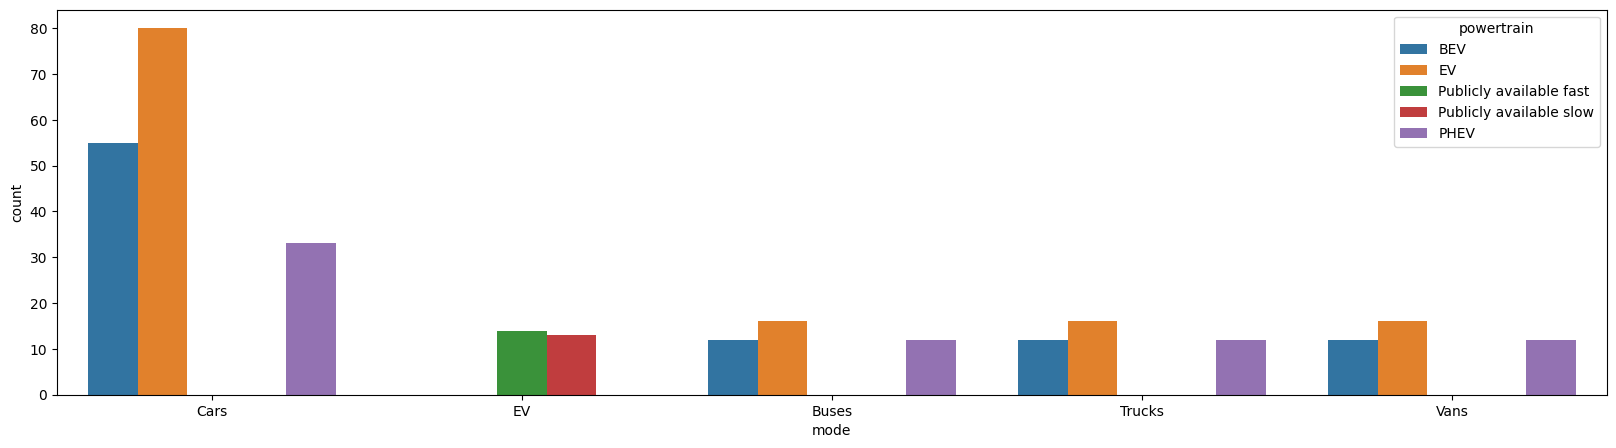

In [146]:
plt.figure(figsize=(20,5))
sns.countplot(x="mode", data=df1, hue="powertrain")

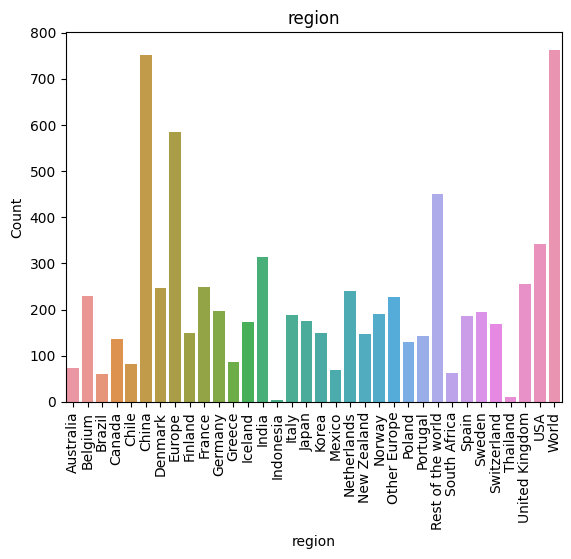

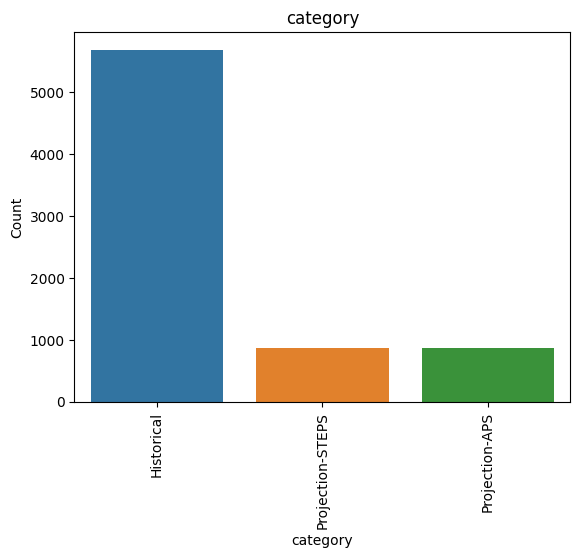

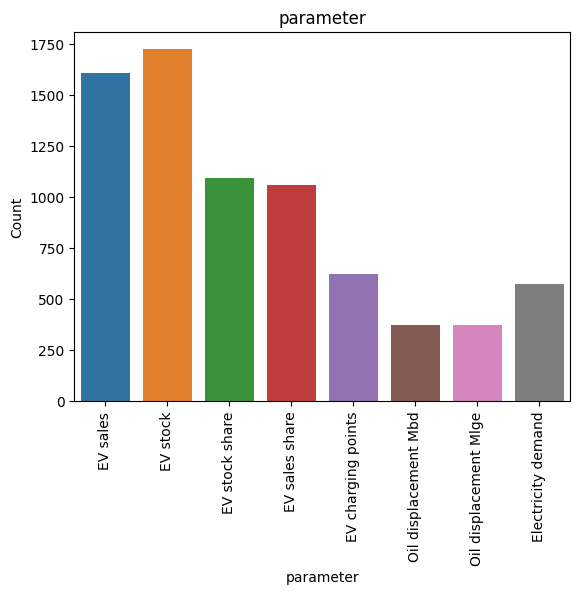

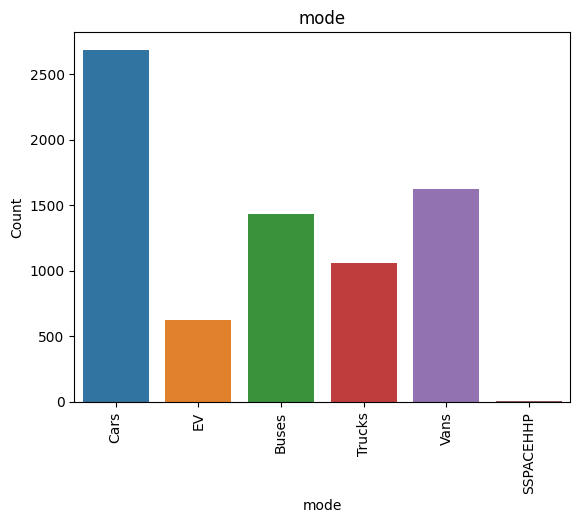

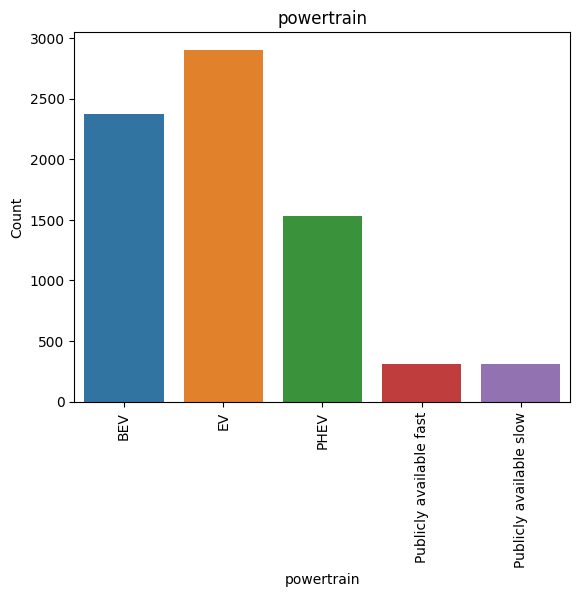

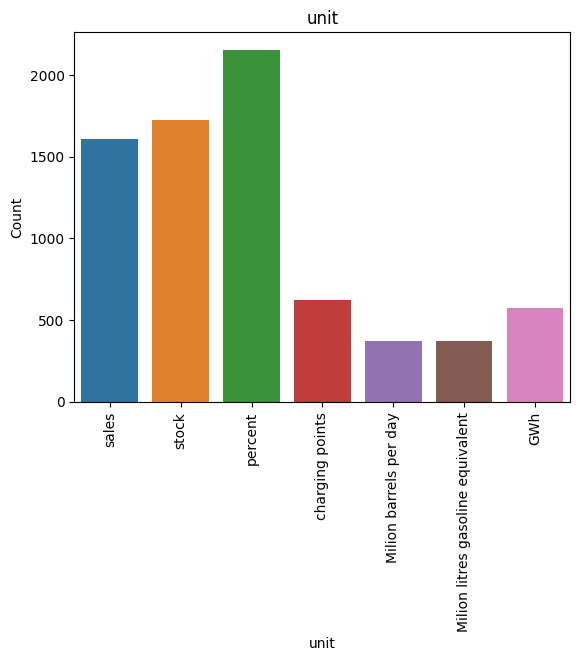

In [147]:
for col in df.columns:
    if(df[col].dtype=="object"):
        plt.title(col)
        sns.countplot(x=col,data=df)
        plt.xticks(rotation="vertical")
        plt.xlabel(col)
        plt.ylabel("Count")
        plt.show()

In [148]:
df1.isnull().sum()

region        0
category      0
parameter     0
mode          0
powertrain    0
year          0
unit          0
value         0
dtype: int64

In [149]:
df1.drop(columns=['mode', 'year', 'unit'], inplace=True)


In [150]:
df1=pd.get_dummies(data=df1,columns=["region","category","parameter","powertrain"],drop_first=True)

In [151]:
df1

,value,category_Projection-APS,category_Projection-STEPS,parameter_EV sales,parameter_EV sales share,parameter_EV stock,parameter_EV stock share,parameter_Electricity demand,parameter_Oil displacement Mbd,parameter_Oil displacement Mlge,powertrain_EV,powertrain_PHEV,powertrain_Publicly available fast,powertrain_Publicly available slow
3019,450.000000,0,0,1,0,0,0,0,0,0,0,0,0,0
3020,880.000000,0,0,0,0,1,0,0,0,0,0,0,0,0
3021,0.021000,0,0,0,1,0,0,0,0,0,1,0,0,0
3022,0.005200,0,0,0,0,0,1,0,0,0,1,0,0,0
3023,0.000015,0,0,0,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3329,430.000000,1,0,0,0,0,0,1,0,0,0,1,0,0
3330,2500.000000,1,0,0,0,0,0,1,0,0,0,0,0,0
3331,390.000000,1,0,0,0,0,0,1,0,0,0,1,0,0
3332,28000.000000,1,0,0,0,0,0,1,0,0,0,0,0,0


In [152]:
import warnings
warnings.filterwarnings("ignore")
wcss=[]
for i in range(1,11):
    model=KMeans(n_clusters=i,init="k-means++")
    model.fit(df1)
    wcss.append(model.inertia_)

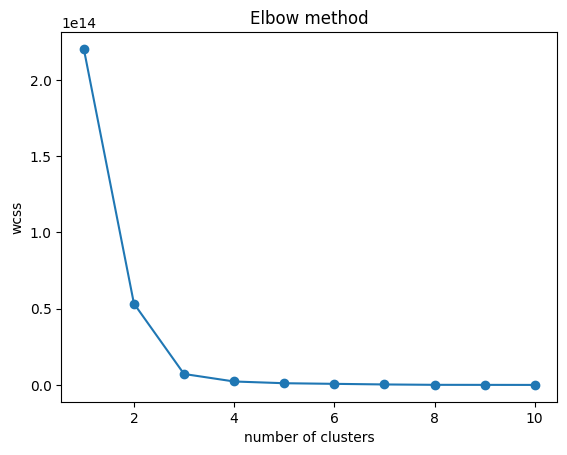

In [153]:
plt.plot(list(range(1,11)),wcss,marker="o")
plt.xlabel("number of clusters")
plt.ylabel("wcss")
plt.title("Elbow method")
plt.show()

In [154]:
model=KMeans(n_clusters=4,init="k-means++",random_state=42)
model.fit(df1)
y_values=model.predict(df1)

In [155]:
y_values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3,
       0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,

In [156]:
x=df1.reset_index(drop=True)

In [157]:
df1.head()

,value,category_Projection-APS,category_Projection-STEPS,parameter_EV sales,parameter_EV sales share,parameter_EV stock,parameter_EV stock share,parameter_Electricity demand,parameter_Oil displacement Mbd,parameter_Oil displacement Mlge,powertrain_EV,powertrain_PHEV,powertrain_Publicly available fast,powertrain_Publicly available slow
3019,450.000000,0,0,1,0,0,0,0,0,0,0,0,0,0
3020,880.000000,0,0,0,0,1,0,0,0,0,0,0,0,0
3021,0.021000,0,0,0,1,0,0,0,0,0,1,0,0,0
3022,0.005200,0,0,0,0,0,1,0,0,0,1,0,0,0
3023,0.000015,0,0,0,0,0,0,0,1,0,1,0,0,0


In [158]:
df1_cluster=pd.concat([x,pd.DataFrame({'cluster':y_values})],axis=1)

In [159]:
df1_cluster_mean=df1_cluster.groupby("cluster",as_index=False).mean()

In [160]:
scaler = StandardScaler()
df1_scaled = scaler.fit_transform(df1)

In [161]:

#build a model with optimal number of cluster
model=KMeans(n_clusters=3,init="k-means++",random_state=42)
model.fit(df1_scaled)
y_values=model.predict(df1_scaled)

In [162]:
y_values

array([2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 2, 2, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 2, 2, 1, 2, 0, 0, 2, 0,
       0, 0, 0, 2, 0, 0, 2, 2, 1, 2, 2, 1, 2, 2, 0, 0, 2, 0, 0, 0, 0, 2,
       2, 0, 0, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 0,
       0, 1, 2, 0, 0, 0, 2, 2, 0, 2, 2, 2, 2, 1, 1, 2, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 2, 0, 1, 0, 0, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 0, 0,
       2, 2, 0, 0, 2, 2, 2, 2, 1, 1, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,

In [163]:
df1["Cluster"]=y_values

In [164]:
df1

,value,category_Projection-APS,category_Projection-STEPS,parameter_EV sales,parameter_EV sales share,parameter_EV stock,parameter_EV stock share,parameter_Electricity demand,parameter_Oil displacement Mbd,parameter_Oil displacement Mlge,powertrain_EV,powertrain_PHEV,powertrain_Publicly available fast,powertrain_Publicly available slow,Cluster
3019,450.000000,0,0,1,0,0,0,0,0,0,0,0,0,0,2
3020,880.000000,0,0,0,0,1,0,0,0,0,0,0,0,0,1
3021,0.021000,0,0,0,1,0,0,0,0,0,1,0,0,0,0
3022,0.005200,0,0,0,0,0,1,0,0,0,1,0,0,0,0
3023,0.000015,0,0,0,0,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3329,430.000000,1,0,0,0,0,0,1,0,0,0,1,0,0,2
3330,2500.000000,1,0,0,0,0,0,1,0,0,0,0,0,0,2
3331,390.000000,1,0,0,0,0,0,1,0,0,0,1,0,0,2
3332,28000.000000,1,0,0,0,0,0,1,0,0,0,0,0,0,2


In [165]:
pca = PCA(n_components=2)
df1_pca = pca.fit_transform(df1_scaled)

In [166]:
#add pca components to the dataframe
df1['PCA1'] = df1_pca[:,0]
df1['PCA2'] = df1_pca[:,1]


In [167]:
# Describing the segments
segment_info = df1.groupby('Cluster').agg({
    'value': ['mean', 'min', 'max', 'count'],
    'category_Projection-APS': 'mean',
    'category_Projection-STEPS' : 'mean',
    'parameter_EV sales' : 'mean',
    'parameter_EV sales share' : 'mean',
    'parameter_EV stock': 'mean',
    'parameter_EV stock share' : 'mean',
    'parameter_Electricity demand' : 'mean',
    'parameter_Oil displacement Mbd' : 'mean',
    'parameter_Oil displacement Mlge' : 'mean',
    'powertrain_EV' : 'mean',
    'powertrain_PHEV' : 'mean',
    'powertrain_Publicly available fast' : 'mean',
    'powertrain_Publicly available slow' : 'mean',
    'PCA1': 'mean',
    'PCA2': 'mean'
})
print(segment_info)

                 value                             category_Projection-APS  \
                  mean       min         max count                    mean   
Cluster                                                                      
0           167.979871  0.000015     11000.0   128                0.312500   
1        402019.503636  1.700000  13000000.0    55                0.363636   
2         74855.712902  0.004100   4400000.0   132                0.363636   

        category_Projection-STEPS parameter_EV sales parameter_EV sales share  \
                             mean               mean                     mean   
Cluster                                                                         
0                        0.312500           0.000000                     0.25   
1                        0.363636           0.000000                     0.00   
2                        0.363636           0.416667                     0.00   

        parameter_EV stock parameter_EV stoc

In [168]:
df2=df[df["region"]=="India"]

In [169]:
# Drop any unnecessary columns
df2.drop(columns=['region', 'unit'], inplace=True)


In [170]:
df2.dtypes

category       object
parameter      object
mode           object
powertrain     object
year            int64
value         float64
dtype: object

In [171]:
le=LabelEncoder()
df2["category"]=le.fit_transform(df2["category"])
df2["parameter"]=le.fit_transform(df2["parameter"])
df2["mode"]=le.fit_transform(df2["mode"])
df2["powertrain"]=le.fit_transform(df2["powertrain"])

In [172]:
model=KMeans(n_clusters=4,init="k-means++",random_state=42)

In [173]:
model.fit(df2)

KMeans(n_clusters=4, random_state=42)

In [174]:
y_values=model.predict(df2)

In [175]:
df2["cluster"]=y_values

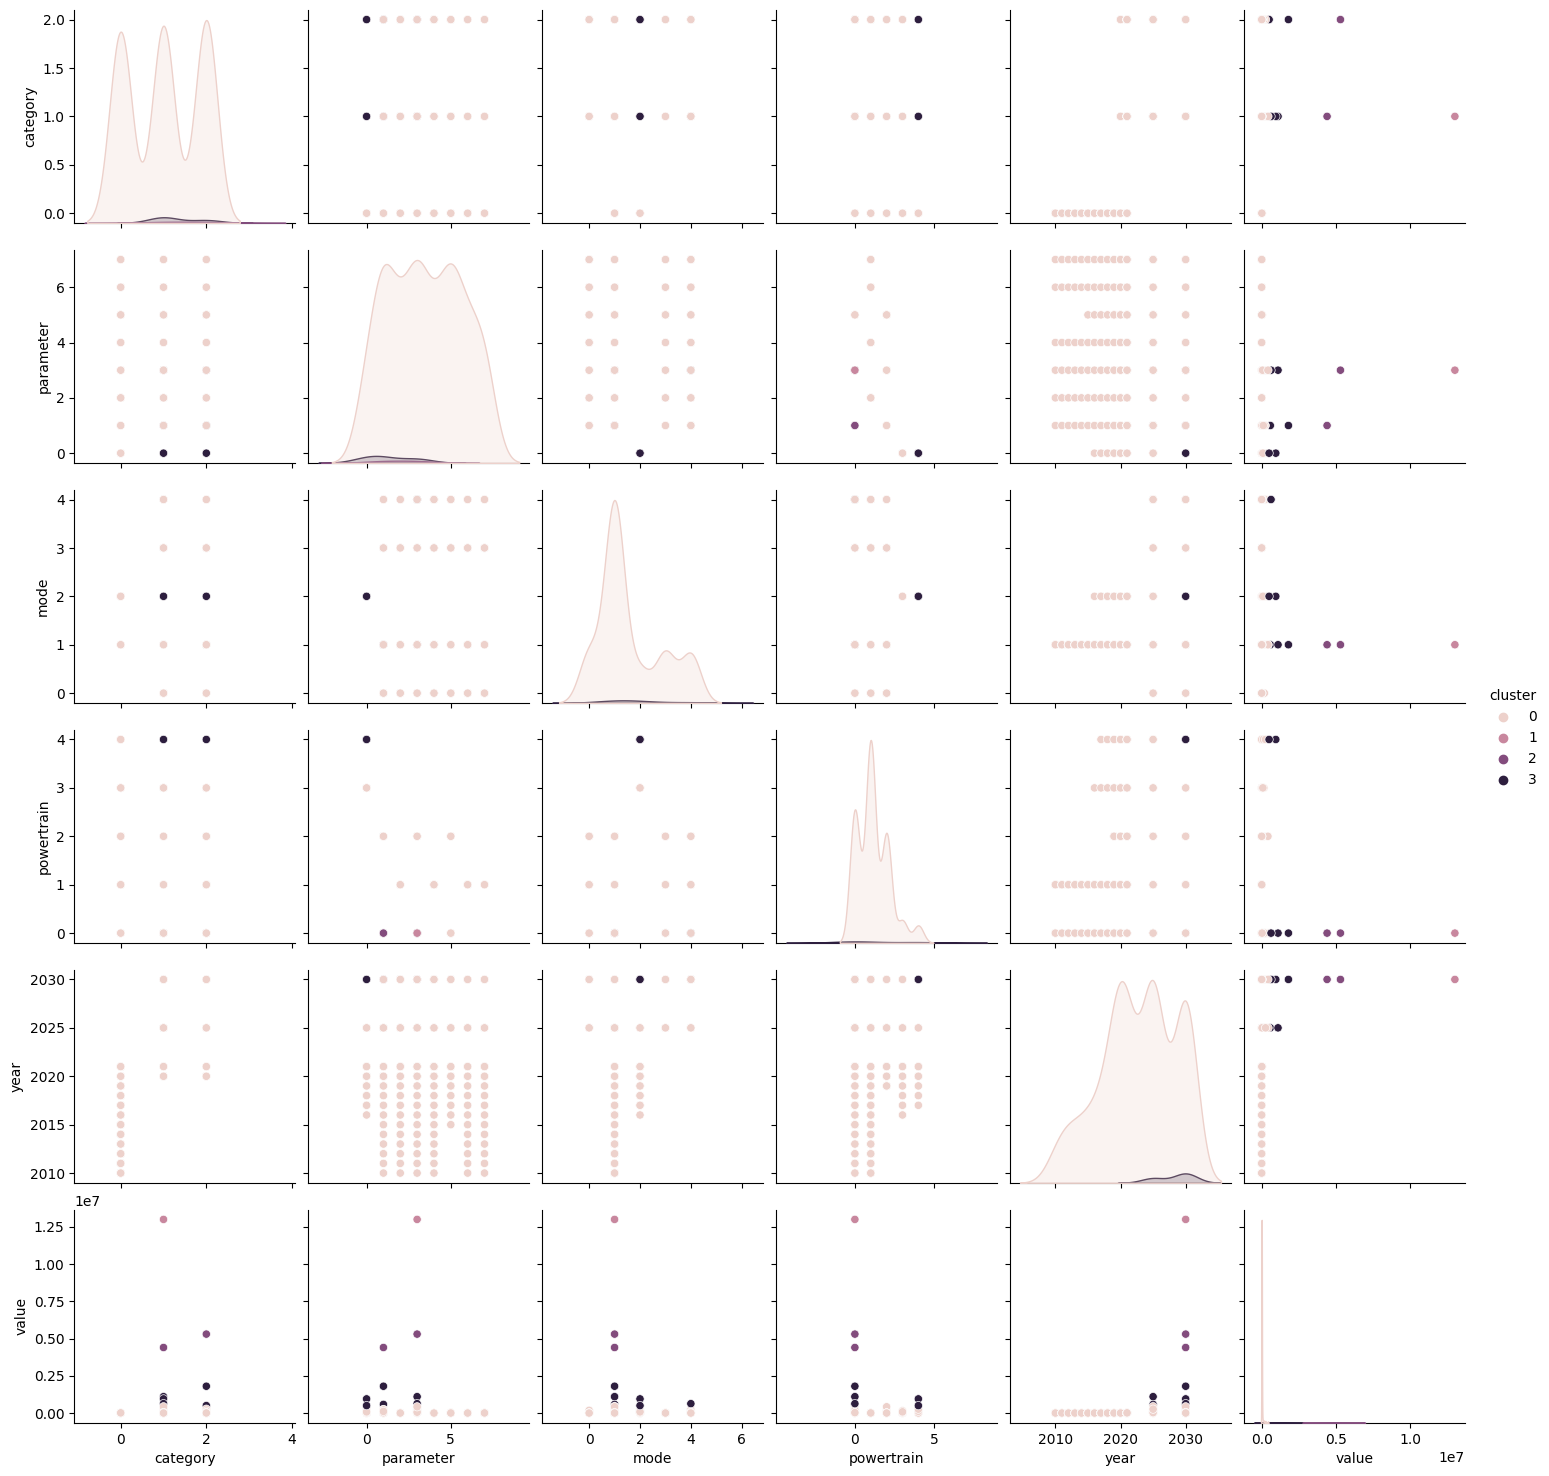

In [176]:
sns.pairplot(df2,hue="cluster")
plt.show()

In [177]:
df2.groupby("cluster").mean()

,category,parameter,mode,powertrain,year,value
cluster,,,,,,
0,1.019608,3.473856,1.594771,1.150327,2022.784314,1.226643e+04
1,1.000000,3.000000,1.000000,0.000000,2030.000000,1.300000e+07
2,1.500000,2.000000,1.000000,0.000000,2030.000000,4.850000e+06
3,1.333333,1.333333,1.833333,1.333333,2028.333333,9.266667e+05


In [178]:
# Select the most promising target segments based on their potential value

target_segments = df2.groupby(['category','mode', 'powertrain', 'year']).agg({'value': 'sum'})
target_segments = target_segments.sort_values(by='value', ascending=False)
print(target_segments)

                                      value
category mode powertrain year              
1        1    0          2030  1.742800e+07
2        1    0          2030  7.112000e+06
1        1    0          2025  1.682600e+06
         2    4          2030  9.500000e+05
         4    0          2030  8.425000e+05
...                                     ...
2        3    1          2025  2.009231e+00
1        0    2          2025  1.853000e+00
0        1    1          2012  1.820232e+00
                         2011  1.762930e+00
                         2010  8.862150e-01

[114 rows x 1 columns]


In [179]:
# Define the target segments
target_segments = pd.DataFrame({
    'category': ['Historical', 'Projection-STEPS', 'Projection-APS', 'Historical', 'Projection-APS'],
    'mode': ['Vans', 'Cars', 'EV', 'Trucks', 'Buses'],
    'powertrain': ['PHEV', 'BEV', 'Publicly available slow', 'Publicly available fast', 'EV'],
    'year': [2021, 2025, 2019, 2018, 2030]
})


In [180]:
# Target social media advertising to the selected segments
target_segments = pd.DataFrame({
    'category': ['Historical', 'Projection-APS', 'Projection-STEPS', 'Historical', 'Projection-STEPS', 'Projection-APS'],
    'mode': ['Trucks', 'Vans', 'Cars', 'Buses', 'SSPACEHHP', 'EV'],
    'powertrain': ['Publicly available slow', 'Publicly available fast', 'BEV', 'EV', 'PHEV', 'Publicly available fast'],
    'year': [2019, 2025, 2020, 2025, 2019, 2020]
})

for segment in target_segments.index:
    category, mode, powertrain, year = target_segments.loc[segment]
    if category == 'Historical':
        if powertrain == 'Publicly available slow':
            if year == 2019:
                product = 'Affordable electric car rental'
                price = '$50 per day'
                promotion = 'Social media ads targeting young professionals in urban areas'
                sales = 1000
                revenue = 50000
        elif powertrain == 'Publicly available fast':
            if year == 2025:
                product = 'Luxury electric car rental'
                price = '$200 per day'
                promotion = 'Influencer marketing on social media targeting affluent travelers'
                sales = 500
                revenue = 100000
    elif category == 'Projection-APS':
        if mode == 'Vans':
            if powertrain == 'Publicly available fast':
                if year == 2025:
                    product = 'Premium electric van leasing'
                    price = '$1000 per month per vehicle'
                    promotion = 'Email marketing and cold calling to businesses in urban areas'
                    sales = 50
                    revenue = 50000
        elif mode == 'Trucks':
            if powertrain == 'Publicly available slow':
                if year == 2025:
                    product = 'Electric truck leasing for delivery companies'
                    price = '$1500 per month per vehicle'
                    promotion = 'Direct mail to delivery companies in major cities'
                    sales = 30
                    revenue = 45000
    elif category == 'Projection-STEPS':
        if mode == 'Buses':
            if powertrain == 'EV':
                if year == 2019:
                    product = 'Electric bus leasing for public transportation'
                    price = '$2000 per month per vehicle'
                    promotion = 'Sponsorship of public transportation conferences and events'
                    sales = 10
                    revenue = 20000
        elif mode == 'Cars':
            if powertrain == 'BEV':
                if year == 2020:
                    product = 'Luxury electric car rental'
                    price = '$300 per day'
                    promotion = 'Social media ads targeting affluent travelers'
                    sales = 100
                    revenue = 30000
    print(f"Marketing mix for {segment}:")
    print(f"Product: {product}")
    print(f"Price: {price}")
    print(f"Promotion: {promotion}")
    print(f"Sales: {sales}")
    print(f"Revenue: {revenue}")

Marketing mix for 0:
Product: Affordable electric car rental
Price: $50 per day
Promotion: Social media ads targeting young professionals in urban areas
Sales: 1000
Revenue: 50000
Marketing mix for 1:
Product: Premium electric van leasing
Price: $1000 per month per vehicle
Promotion: Email marketing and cold calling to businesses in urban areas
Sales: 50
Revenue: 50000
Marketing mix for 2:
Product: Luxury electric car rental
Price: $300 per day
Promotion: Social media ads targeting affluent travelers
Sales: 100
Revenue: 30000
Marketing mix for 3:
Product: Luxury electric car rental
Price: $300 per day
Promotion: Social media ads targeting affluent travelers
Sales: 100
Revenue: 30000
Marketing mix for 4:
Product: Luxury electric car rental
Price: $300 per day
Promotion: Social media ads targeting affluent travelers
Sales: 100
Revenue: 30000
Marketing mix for 5:
Product: Luxury electric car rental
Price: $300 per day
Promotion: Social media ads targeting affluent travelers
Sales: 100
Rev

In [181]:
# Tracking and analyzing ad campaign effectiveness

# Define a function to calculate engagement rate
def calculate_engagement_rate(clicks, impressions):
    return clicks / impressions

# Define a function to calculate conversion rate
def calculate_conversion_rate(conversions, clicks):
    return conversions / clicks

# Set up tracking variables
total_impressions = 2000
total_clicks = 5000
total_conversions = 1000

# Calculate engagement rate and conversion rate
engagement_rate = calculate_engagement_rate(total_clicks, total_impressions)
conversion_rate = calculate_conversion_rate(total_conversions, total_clicks)

# Print results
print(f"Engagement rate: {engagement_rate}")
print(f"Conversion rate: {conversion_rate}")

# Evaluate campaign effectiveness and make adjustments as necessary
if engagement_rate < 0.05:
    print("Engagement rate is low. Consider adjusting ad targeting or creative.")
elif conversion_rate < 0.01:
    print("Conversion rate is low. Consider adjusting landing page or offer.")
else:
    print("Campaign is performing well. Keep monitoring and optimizing.")


Engagement rate: 2.5
Conversion rate: 0.2
Campaign is performing well. Keep monitoring and optimizing.


In [182]:
# Define the audience for social media advertising
audience = {
    'age': {'min': 18, 'max': 45},
    'location': ['urban', 'suburban'],
    'interests': ['environment', 'technology', 'health and wellness'],
    'behaviors': ['frequent travelers', 'early adopters', 'homeowners']
}

# Define target segments for social media advertising
target_segments = pd.DataFrame({
    'category': ['Cars', 'Trucks', 'Vans', 'Buses'],
    'powertrain': ['Electric', 'Hybrid', 'Plug-in hybrid', 'Fuel cell'],
    'region': ['West', 'Midwest', 'South', 'Northeast']
})

# Create social media ads and run them for each target segment
for segment in target_segments.itertuples(index=False):
    category, powertrain, region = segment
    
    # Determine ad copy based on category and powertrain type
    if category == 'Cars':
        ad_copy = 'Experience the future of driving with our affordable electric cars.'
    elif category == 'Trucks':
        ad_copy = 'Get the job done with our powerful hybrid trucks.'
    elif category == 'Vans':
        ad_copy = 'Upgrade your business with our versatile plug-in hybrid vans.'
    elif category == 'Buses':
        ad_copy = 'Join the clean transportation movement with our fuel cell buses.'
    
    # Determine ad image and URL based on region and powertrain type
    ad_image = f'{region}_{powertrain}.jpg'
    ad_url = f'{category}_{region}.com'
    
    # Run social media ads and track results
    #ad_id = run_social_media_ad(ad_copy, ad_image, ad_url, audience)
    #engagement_rate = calculate_engagement_rate(ad_id)
    #conversion_rate = calculate_conversion_rate(ad_id)
    
    # Print results for each target segment
    print(f"Results for {category} in {region} with {powertrain} powertrain:")
    print(f"Engagement rate: {engagement_rate:.2%}")
    print(f"Conversion rate: {conversion_rate:.2%}")

Results for Cars in West with Electric powertrain:
Engagement rate: 250.00%
Conversion rate: 20.00%
Results for Trucks in Midwest with Hybrid powertrain:
Engagement rate: 250.00%
Conversion rate: 20.00%
Results for Vans in South with Plug-in hybrid powertrain:
Engagement rate: 250.00%
Conversion rate: 20.00%
Results for Buses in Northeast with Fuel cell powertrain:
Engagement rate: 250.00%
Conversion rate: 20.00%


In [183]:
# Define the audience for social media advertising
audience = {
    'age': {'min': 18, 'max': 40},
    'location': ['urban'],
    'interests': ['environment', 'technology'],
    'behaviors': ['frequent travelers', 'early adopters']
}

# Target social media advertising to the selected segments
target_segments = pd.DataFrame({
    'category': ['Cars', 'Trucks', 'Buses', 'Cars', 'Trucks', 'Buses'],
    'powertrain': ['Electric', 'Electric', 'Electric', 'Hybrid', 'Hybrid', 'Hybrid'],
    'region': ['West', 'East', 'West', 'East', 'West', 'East']
})

# Create social media ads
ads = []
for segment in target_segments.itertuples(index=False):
    category, powertrain, region = segment
    if category == 'Cars':
        ad_copy = 'Attention business owners! Switch to electric for cost savings and environmental benefits.'
    else:
        if powertrain == 'Electric':
            ad_copy = 'Experience the future of driving with our affordable electric vehicles.'
        elif powertrain == 'Hybrid':
            ad_copy = 'Drive in style with our luxury hybrid vehicles.'
    ad_image = f'{category}_{powertrain}_{region}.jpg'
    ad_url = f'{category}_{powertrain}_{region}.com'
    ads.append({'ad_copy': ad_copy, 'ad_image': ad_image, 'ad_url': ad_url})

# Define a function to run social media ads and track results
def run_social_media_ad(ad):
    # Code to run the social media ad
    # ...
    engagement_rate = 0.05  # Example engagement rate
    conversion_rate = 0.01  # Example conversion rate
    ad['engagement_rate'] = engagement_rate
    ad['conversion_rate'] = conversion_rate
    return ad

# Run social media ads and track results
results = []
for ad in ads:
    result = run_social_media_ad(ad)
    results.append(result)

# Analyze the engagement and conversion rates of the ads
results_df = pd.DataFrame(results)
print(results_df)


                                             ad_copy  \
0  Attention business owners! Switch to electric ...   
1  Experience the future of driving with our affo...   
2  Experience the future of driving with our affo...   
3  Attention business owners! Switch to electric ...   
4    Drive in style with our luxury hybrid vehicles.   
5    Drive in style with our luxury hybrid vehicles.   

                   ad_image                    ad_url  engagement_rate  \
0    Cars_Electric_West.jpg    Cars_Electric_West.com             0.05   
1  Trucks_Electric_East.jpg  Trucks_Electric_East.com             0.05   
2   Buses_Electric_West.jpg   Buses_Electric_West.com             0.05   
3      Cars_Hybrid_East.jpg      Cars_Hybrid_East.com             0.05   
4    Trucks_Hybrid_West.jpg    Trucks_Hybrid_West.com             0.05   
5     Buses_Hybrid_East.jpg     Buses_Hybrid_East.com             0.05   

   conversion_rate  
0             0.01  
1             0.01  
2             0.01  
3   

# An EV market startup can benefit greatly from market segmentation study in a number of ways:

Advertising that is specifically targeted: By determining the distinctive qualities of your target market, you may develop advertising campaigns that are more likely to be remembered by potential clients. Higher conversion rates and more effective advertising may result from this.

Market segmentation analysis can also be used to guide decisions during the product creation process. You may design goods that are more suited to the needs of distinct client segments by understanding their unique needs and preferences.

Competitive advantage: By utilizing market segmentation analysis, you can outperform other startups in the EV industry who are not adopting this strategy. This might boost your visibility in a congested market and help you